In [1]:
!git clone 'https://github.com/Shenggan/BCCD_Dataset.git'

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 22.85 MiB/s, done.
Resolving deltas: 100% (378/378), done.


#**DATA PRE-PROCESSING**

In [2]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [3]:
"""Extracting Data Labels"""

labels = sorted(glob('/content/BCCD_Dataset/BCCD/Annotations/*.xml'))
# print(len(labels))
df = []
total = 0
for file in labels:
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  filename = str(total) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  total += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('/content/blood_cell_detection.csv', index=False)




In [4]:
img_width = 640
img_height = 480

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv('/content/blood_cell_detection.csv')
print(len(df))
le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

4888
['Platelets' 'RBC' 'WBC']


,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,BloodImage_00000.jpg,0.jpg,WBC,260,491,177,376,2,231,199,375,276,0.585938,0.360938,0.575000,0.414583
1,BloodImage_00000.jpg,0.jpg,RBC,78,184,336,435,1,106,99,131,385,0.204687,0.165625,0.802083,0.206250
2,BloodImage_00000.jpg,0.jpg,RBC,63,169,237,336,1,106,99,116,286,0.181250,0.165625,0.595833,0.206250
3,BloodImage_00000.jpg,0.jpg,RBC,214,320,362,461,1,106,99,267,411,0.417187,0.165625,0.856250,0.206250
4,BloodImage_00000.jpg,0.jpg,RBC,414,506,352,445,1,92,93,460,398,0.718750,0.143750,0.829167,0.193750
5,BloodImage_00000.jpg,0.jpg,RBC,555,640,356,455,1,85,99,597,405,0.932813,0.132812,0.843750,0.206250
6,BloodImage_00000.jpg,0.jpg,RBC,469,567,412,480,1,98,68,518,446,0.809375,0.153125,0.929167,0.141667
7,BloodImage_00000.jpg,0.jpg,RBC,1,87,333,437,1,86,104,44,385,0.068750,0.134375,0.802083,0.216667
8,BloodImage_00000.jpg,0.jpg,RBC,4,95,406,480,1,91,74,49,443,0.076563,0.142187,0.922917,0.154167
9,BloodImage_00000.jpg,0.jpg,RBC,155,247,74,174,1,92,100,201,124,0.314063,0.143750,0.258333,0.208333


In [5]:
df.describe()


,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,268.287439,374.892390,189.159984,290.785802,1.002250,106.604951,101.625818,321.328151,239.726064,0.502075,0.166570,0.499429,0.211720
std,171.714138,171.521492,126.038208,126.670921,0.387279,35.403703,31.899194,170.700782,125.343374,0.266720,0.055318,0.261132,0.066457
min,1.000000,21.000000,1.000000,26.000000,0.000000,0.000000,0.000000,11.000000,13.000000,0.017188,0.000000,0.027083,0.000000
25%,116.000000,226.000000,78.000000,181.000000,1.000000,93.000000,90.000000,173.000000,129.000000,0.270313,0.145313,0.268750,0.187500
50%,265.000000,383.000000,185.000000,291.000000,1.000000,105.000000,101.000000,323.000000,238.000000,0.504687,0.164062,0.495833,0.210417
75%,416.000000,524.000000,297.000000,406.000000,1.000000,116.000000,111.000000,470.000000,351.000000,0.734375,0.181250,0.731250,0.231250
max,618.000000,640.000000,455.000000,480.000000,2.000000,338.000000,286.000000,629.000000,467.000000,0.982812,0.528125,0.972917,0.595833


In [6]:
df.tail(10)


,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
4878,BloodImage_00410.jpg,363.jpg,RBC,1,108,221,322,1,107,101,54,271,0.084375,0.167187,0.564583,0.210417
4879,BloodImage_00410.jpg,363.jpg,RBC,582,639,379,480,1,57,101,610,429,0.953125,0.089063,0.893750,0.210417
4880,BloodImage_00410.jpg,363.jpg,RBC,457,562,372,456,1,105,84,509,414,0.795312,0.164062,0.862500,0.175000
4881,BloodImage_00410.jpg,363.jpg,RBC,563,640,20,113,1,77,93,601,66,0.939063,0.120313,0.137500,0.193750
4882,BloodImage_00410.jpg,363.jpg,RBC,304,400,262,387,1,96,125,352,324,0.550000,0.150000,0.675000,0.260417
4883,BloodImage_00410.jpg,363.jpg,Platelets,239,291,275,321,0,52,46,265,298,0.414062,0.081250,0.620833,0.095833
4884,BloodImage_00410.jpg,363.jpg,Platelets,121,189,260,320,0,68,60,155,290,0.242188,0.106250,0.604167,0.125000
4885,BloodImage_00410.jpg,363.jpg,Platelets,57,104,119,167,0,47,48,80,143,0.125000,0.073438,0.297917,0.100000
4886,BloodImage_00410.jpg,363.jpg,Platelets,1,29,286,327,0,28,41,15,306,0.023438,0.043750,0.637500,0.085417
4887,BloodImage_00410.jpg,363.jpg,WBC,367,611,166,394,2,244,228,489,280,0.764062,0.381250,0.583333,0.475000


Input shape - (480,640,3)

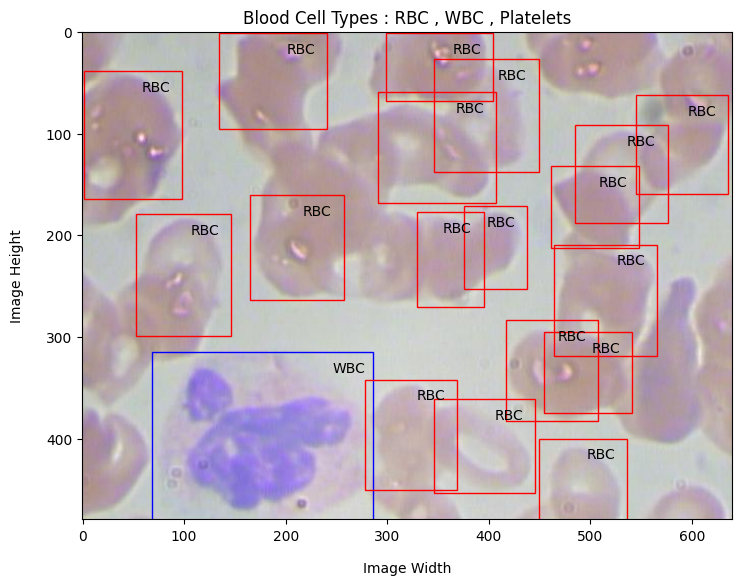

In [23]:
import cv2


def show_mask(image_name):
  """A function to display image and bounding box"""
  fig = plt.figure(figsize=(6.5, 6.5))
  ax = fig.add_axes([0,0,1,1])
  image = plt.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_0000' + image_name)
  plt.imshow(image)

  # ax.imshow(image)

  for _, row in df[df.filename == image_name].iterrows():
        xmin = row.xmin
        xmax = row.xmax
        ymin = row.ymin
        ymax = row.ymax

        width = xmax - xmin
        height = ymax - ymin

        if row.cell_type == 'RBC':
            edgecolor = 'r'
            ax.annotate('RBC', xy=(xmax-40, ymin+20))
        elif row.cell_type == 'WBC':
            edgecolor = 'b'
            ax.annotate('WBC', xy=(xmax-40, ymin+20))
        elif row.cell_type == 'Platelets':
            edgecolor = 'g'
            ax.annotate('Platelets', xy=(xmax-40, ymin+20))

        rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
        ax.add_patch(rect)
  plt.title("Blood Cell Types : RBC , WBC , Platelets")
  plt.text(0.5, -0.1, f"Image Width", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
  plt.text(-0.1, 0.5, f"Image Height", horizontalalignment='center', verticalalignment='center', rotation=90, transform=plt.gca().transAxes)


    # plt.show()

show_mask('1.jpg')



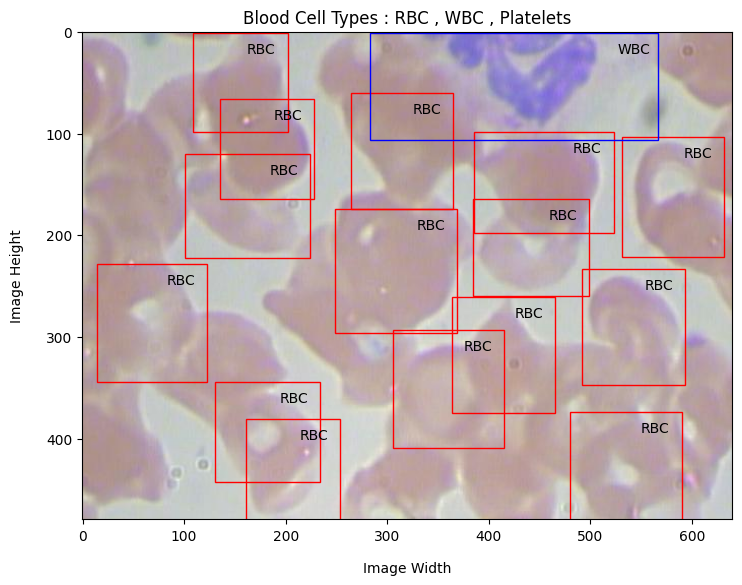

In [24]:
show_mask('2.jpg')

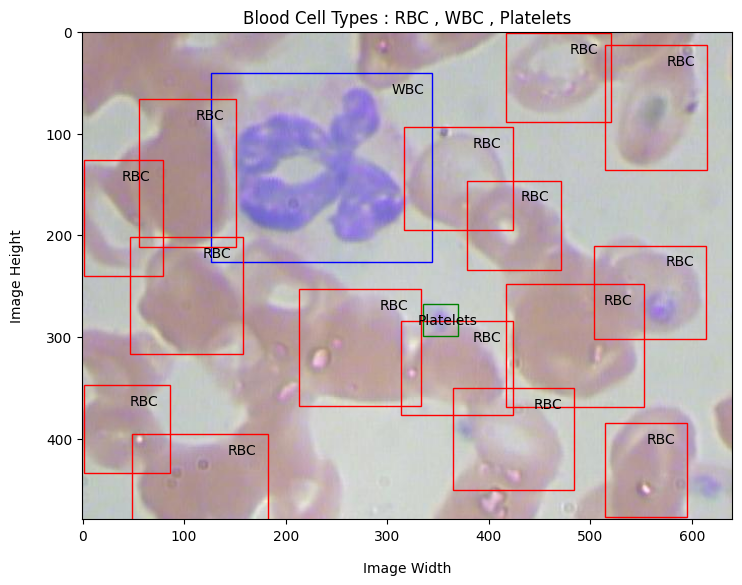

In [25]:
show_mask('3.jpg')

# Dataset Distribution

In [23]:
from sklearn.model_selection import train_test_split


df_train_temp, df_valid = train_test_split(df, test_size=0.10, random_state=42, shuffle=True, stratify=df['cell_type'])

df_train, df_test = train_test_split(df_train_temp, test_size=0.075, random_state=42, shuffle=True, stratify=df_train_temp['cell_type'])


# Data Visualization

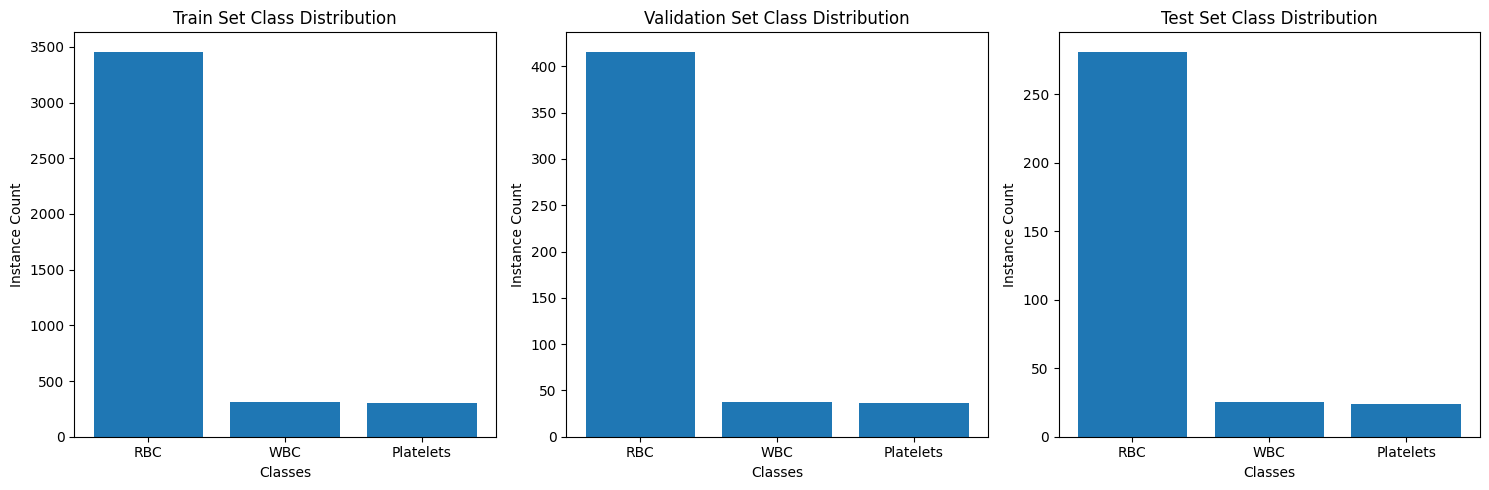

In [24]:
"""Plotting of total instances of RBC ,WBC ,Platelets in Train,Validation an Test Dataset"""
plt.subplot(1, 3, 2)
plt.bar(valid_class_counts.index, valid_class_counts.values)
plt.title('Validation Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Instance Count')

plt.subplot(1, 3, 3)
plt.bar(test_class_counts.index, test_class_counts.values)
plt.title('Test Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Instance Count')

plt.tight_layout()
plt.show()




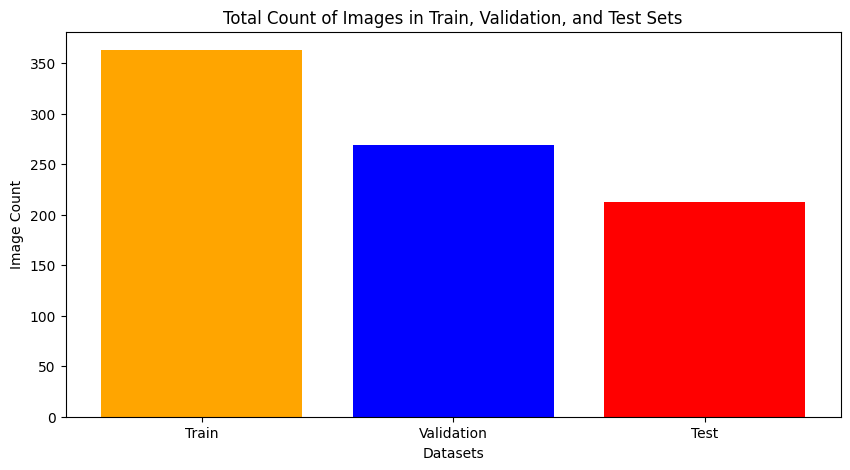

In [25]:
"""Plotting total count of images in train, validation, and test sets"""
plt.figure(figsize=(10, 5))

labels = ['Train', 'Validation', 'Test']
values = [train_total_images, valid_total_images, test_total_images]

plt.bar(labels, values, color=['orange', 'blue', 'red'])
plt.title('Total Count of Images in Train, Validation, and Test Sets')
plt.xlabel('Datasets')
plt.ylabel('Image Count')

plt.show()